# Work By Willy Tshivhula : Student number 218064719

### Topic : Time Series Analysis of Daily Steps Data

In this case study, we will perform a time series analysis on a fitness dataset to
gain insights into the patterns and trends in an individual's daily steps over time. The dataset
contains information about daily steps taken by an individual and some superfluous data.
Our goal is to analyze the data and identify any recurring patterns, seasonal variations, or
anomalies that could help optimize the individual's fitness routine.


Dataset: The fitness dataset comprises daily steps measurements for 15 months. It includes
the following variables:
1. Date: The date of the measurement.
2. Steps: The number of steps taken by the individual on a given day.
3. Goal: A daily steps goal

Objectives:
1. Explore the overall trends in daily steps taken by the individual.
2. Identify any seasonality or recurring patterns in the data.
3. Forecast the time series and test the fitness of it.


our final model i tried manipulating it to give me the best forecasting the following was the final order: 
- order = (0, 0, 1)  # (p, d, q) order
- seasonal_order = (1, 0, 4, 10)  # (P, D, Q, seasonal_period)

RMSE of 2600 we also have one for 2509


In [24]:
#imports

import os
import pandas as pd
import warnings

from PIL import Image, ImageDraw
from IPython.display import display

# Set line parameters to create our line for neatness
line_color = (0, 0, 0) 
line_width = 5
line_length = 1200
image = Image.new("RGB", (line_length, line_width), line_color)
display(image)

## Methodology 
Data Preparation :
1. Load the dataset into a Python programming environment.
2. Convert the "Date" column to the appropriate date format.
3. Set the index
4. Handle missing values, if any, through imputation or removal.


This following code reads data from 15 CSV files named 'Steps1.csv' to 'Steps15.csv', and combines their contents into a single DataFrame named `combined_data`. It iterates through each CSV file, loads its data into a temporary DataFrame (`df`), and appends it to the `combined_data`. After the loop, `combined_data` holds the consolidated data from all CSV files, making it easier to analyze the data as a unified dataset.

In [63]:
#loading the data
warnings.filterwarnings("ignore", category=FutureWarning, message="The frame.append method is deprecated")

csv_files = ['Steps1.csv', 'Steps2.csv', 'Steps3.csv', 'Steps4.csv', 'Steps5.csv', 'Steps6.csv',
             'Steps7.csv', 'Steps8.csv', 'Steps9.csv', 'Steps10.csv', 'Steps11.csv', 'Steps12.csv', 'Steps13.csv',
             'Steps14.csv', 'Steps15.csv']

combined_data = pd.DataFrame()

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    combined_data = combined_data.append(df, ignore_index=True)

print (combined_data.head())

# Set line parameters to create our line for neatness
line_color = (0, 0, 0)  # Black color
line_width = 5
line_length = 500
image = Image.new("RGB", (line_length, line_width), line_color)
display(image)

print (combined_data.info())





          Date  Actual  Goal
0  May 31 2022       0  8000
1   Jun 1 2022       0  8000
2   Jun 2 2022       0  8000
3   Jun 3 2022    1102  8000
4   Jun 4 2022    1254  8000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    420 non-null    object
 1   Actual  420 non-null    int64 
 2   Goal    420 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.0+ KB
None


### Continuation with first step (Data Preparation)

The following bits of code are there to convert the Date column to an approporate date format and fill in the missing values with Zeros, then set the index.

In [11]:

#Convert the "Date" column to the appropriate date format
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

#fill missing values with zeros:
combined_data.fillna(0, inplace=True)

# Set the index to "Date"
combined_data.set_index('Date', inplace=True)



In [23]:
print(combined_data.index)


DatetimeIndex(['2022-05-31', '2022-06-01', '2022-06-02', '2022-06-03',
               '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07',
               '2022-06-08', '2022-06-09',
               ...
               '2023-07-15', '2023-07-16', '2023-07-17', '2023-07-18',
               '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-22',
               '2023-07-23', '2023-07-24'],
              dtype='datetime64[ns]', name='Date', length=420, freq=None)


### Additional data preparations (Data Preparation)

In [64]:
# Check if the index at 'Goal' and 'Actual' has numeric values
if combined_data['Goal'].apply(lambda x: isinstance(x, (int, float))).all() and \
   combined_data['Actual'].apply(lambda x: isinstance(x, (int, float))).all():
    print("All values are numeric. We are Good to Go!")
else:
    print("Some values are not numeric. We still have some cleaning to do")

    
# Set line parameters to create our line for neatness
line_color = (0, 0, 0)  # Black color
line_width = 5
line_length = 1200
image = Image.new("RGB", (line_length, line_width), line_color)
display(image)




All values are numeric. We are Good to Go!


## Comment 
### We have prepared our data and made sure its clean and has no values, made sure we replace any empty spaces, also checked if other field only have numerical data only, to make sure we are consistent with out dataset. Now we can move to step two.

Our data has about 420 records

## Step 2

1. Visualize the time series of daily steps to understand the overall trends and
patterns.
2. Calculate descriptive statistics such as mean, median, and standard deviation

we will add a few descriptive analysis to make step 2 have more.

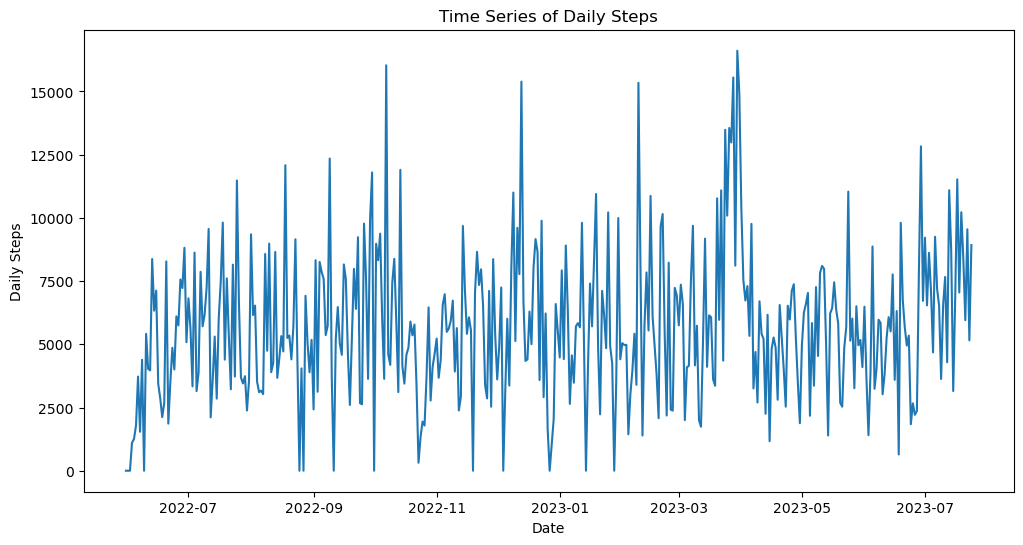

In [13]:
import matplotlib.pyplot as plt

# Plot the time series of daily steps
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['Actual'])
plt.title('Time Series of Daily Steps')
plt.xlabel('Date')
plt.ylabel('Daily Steps')
plt.show()


The below code has the final output as :

1. Count: This indicates the number of data points in the dataset. In this case, there are 420 data points, which matches the goal of having 420 data points.

2. Mean: The mean (average) of the data points. The actual mean is 5674.14, which is lower than the goal mean of 7682.14. This suggests that the actual values are generally below the desired goal.

3. Standard Deviation (Std): The standard deviation measures the spread or dispersion of the data. The actual standard deviation is 2930.57, while the goal's standard deviation is 613.72. The higher actual standard deviation suggests greater variability compared to the desired goal.

4. Minimum (Min): The minimum value in the dataset. The actual minimum is 0.00, which is significantly lower than the goal minimum of 6500.00. This indicates that some actual values are far below the desired goal.

5. 25th Percentile (25%): This is the value below which 25% of the data falls. The actual value at the 25th percentile is 3634.00, which is below the goal of 8000.00. This suggests that a significant portion of the actual values are lower than the desired goal.

6. 50th Percentile (50%): This is the median, which represents the middle value of the dataset when it's ordered. The actual median is 5402.00, which is lower than the goal of 8000.00. This further indicates that a substantial portion of the actual values are below the goal.

7. 75th Percentile (75%): This is the value below which 75% of the data falls. The actual value at the 75th percentile is 7349.00, still below the goal of 8000.00. While better than the median, this suggests that a significant portion of the actual values is still below the goal.

8. Maximum (Max): The maximum value in the dataset. The actual maximum is 16611.00, which exceeds the goal maximum of 8000.00. This indicates that some actual values are significantly higher than the desired goal.

Descriptive Statistics:
+-------+----------+---------+
|       |  Actual  |  Goal   |
+-------+----------+---------+
| count |  420.00  | 420.00  |
| mean  | 5674.14  | 7682.14 |
|  std  | 2930.57  | 613.72  |
|  min  |   0.00   | 6500.00 |
|  25%  | 3634.00  | 8000.00 |
|  50%  | 5402.00  | 8000.00 |
|  75%  | 7349.00  | 8000.00 |
|  max  | 16611.00 | 8000.00 |
+-------+----------+---------+


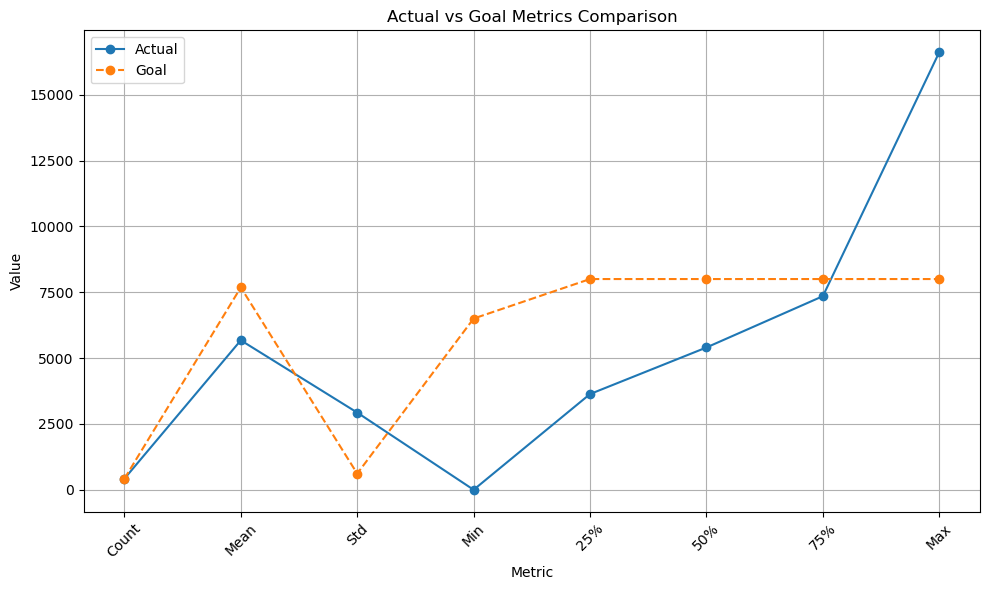

In [59]:
from tabulate import tabulate

# Calculate descriptive statistics
descriptive_stats = combined_data.describe()
formatted_stats = descriptive_stats.applymap('{:.2f}'.format)
print("Descriptive Statistics:")
print(tabulate(formatted_stats, headers='keys', tablefmt='pretty'))

import matplotlib.pyplot as plt

metrics = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
actual_values = [420, 5674.14, 2930.57, 0.00, 3634.00, 5402.00, 7349.00, 16611.00]
goal_values = [420, 7682.14, 613.72, 6500.00, 8000.00, 8000.00, 8000.00, 8000.00]

plt.figure(figsize=(10, 6))
plt.plot(metrics, actual_values, marker='o', label='Actual')
plt.plot(metrics, goal_values, marker='o', linestyle='dashed', label='Goal')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Actual vs Goal Metrics Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



# Set line parameters to create our line for neatness
line_color = (0, 0, 0)  # Black color
line_width = 5
line_length = 1200
image = Image.new("RGB", (line_length, line_width), line_color)
display(image)

Additional descriptive analytics Below

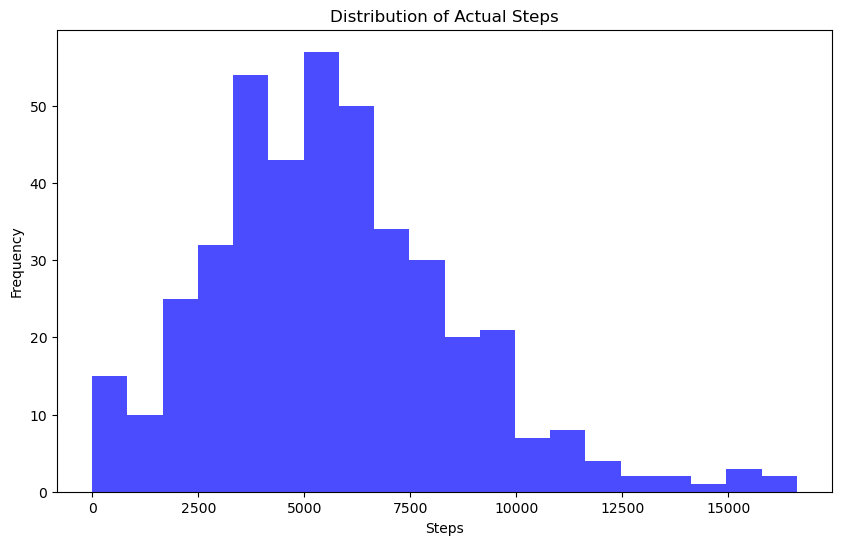

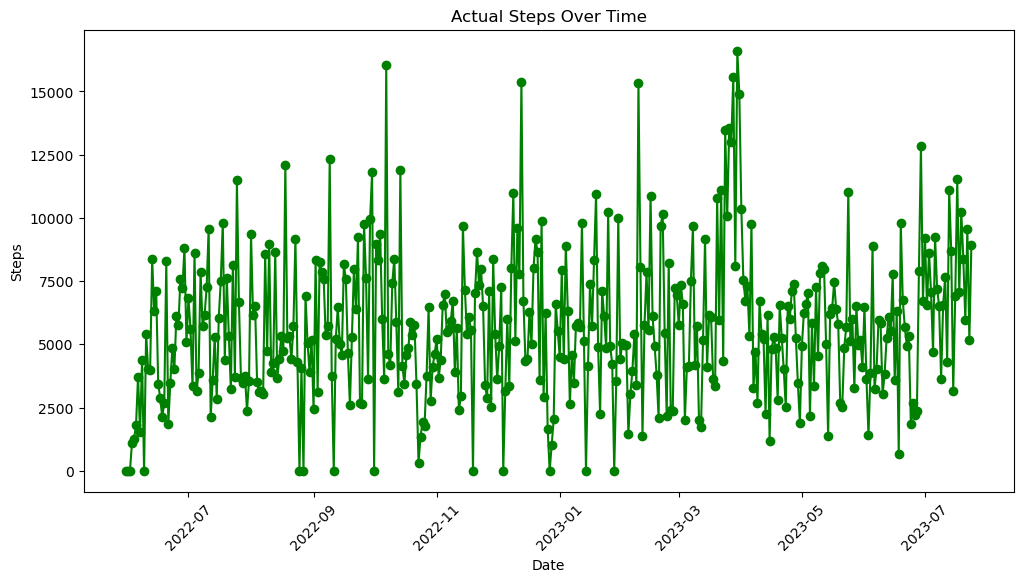

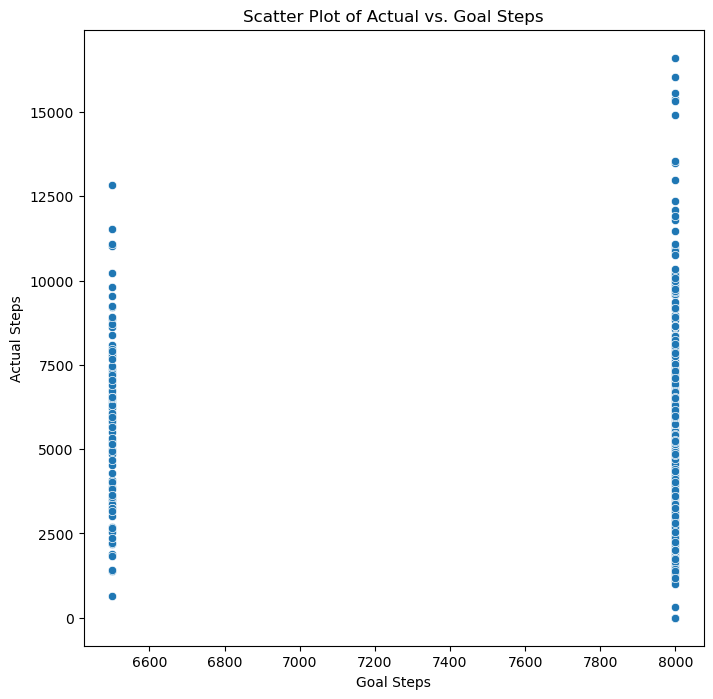

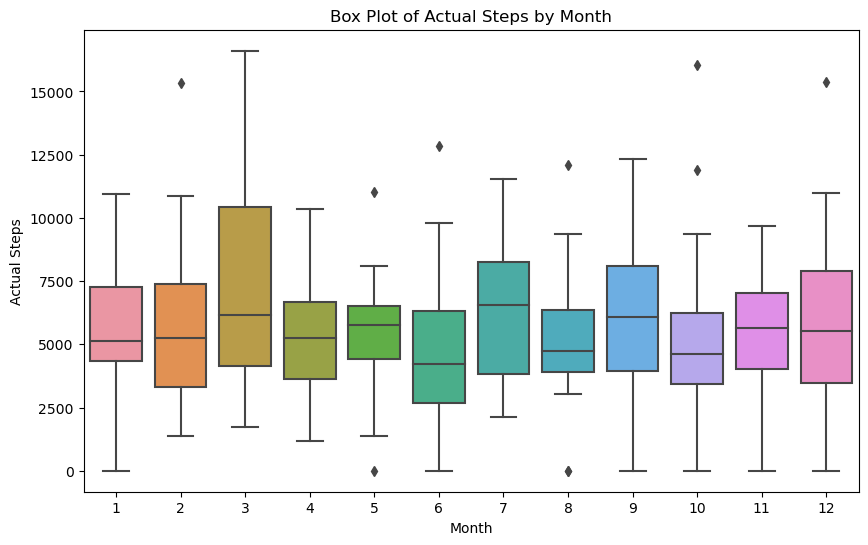

In [38]:
import seaborn as sns

# Load your combined data from a CSV file
combined_data = pd.read_csv('combined_data.csv')
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.set_index('Date', inplace=True)

# Plot the distribution of 'Actual' steps using a histogram
plt.figure(figsize=(10, 6))
plt.hist(combined_data['Actual'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Actual Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

# Plot a line chart of 'Actual' steps over time
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['Actual'], marker='o', color='green')
plt.title('Actual Steps Over Time')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.show()

# Create a scatter plot between 'Actual' and 'Goal' steps
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Goal', y='Actual', data=combined_data)
plt.title('Scatter Plot of Actual vs. Goal Steps')
plt.xlabel('Goal Steps')
plt.ylabel('Actual Steps')
plt.show()

# Create a box plot of 'Actual' steps grouped by month
combined_data['Month'] = combined_data.index.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Actual', data=combined_data)
plt.title('Box Plot of Actual Steps by Month')
plt.xlabel('Month')
plt.ylabel('Actual Steps')
plt.show()

# Set line parameters to create our line for neatness
line_color = (0, 0, 0)  # Black color
line_width = 5
line_length = 1200
image = Image.new("RGB", (line_length, line_width), line_color)
display(image)

## Step 3

Test for seasonality and if the data is stationary:
1. Perform a seasonal decompositon of the time series to separate the data into 
trend, seasonal, and residual components.
2. Plot and interpret the decomposed components to identify any patterns or 
seasonality.

<Figure size 1200x800 with 0 Axes>

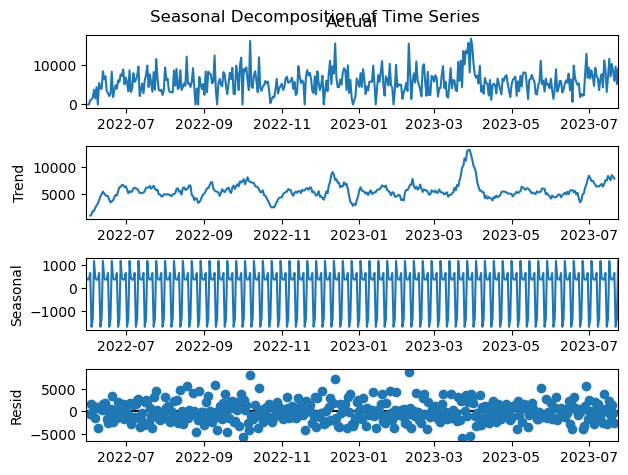

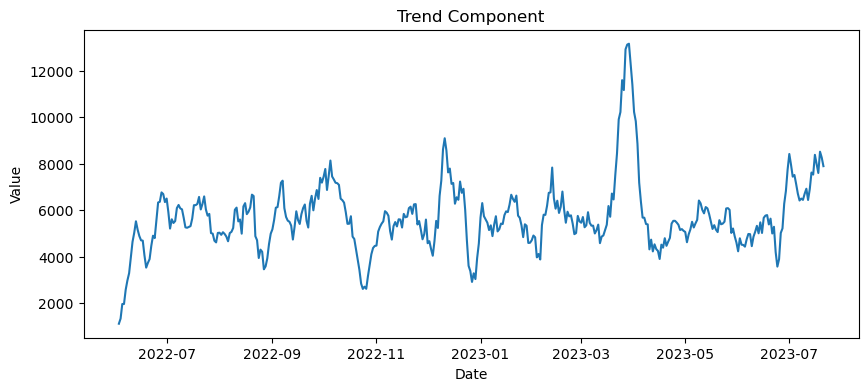

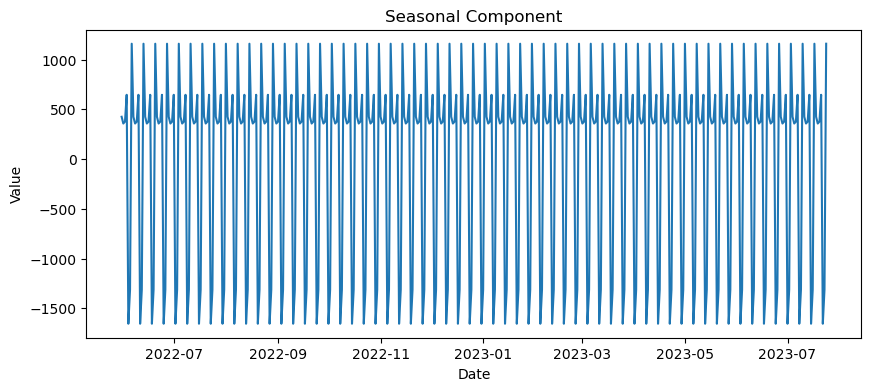

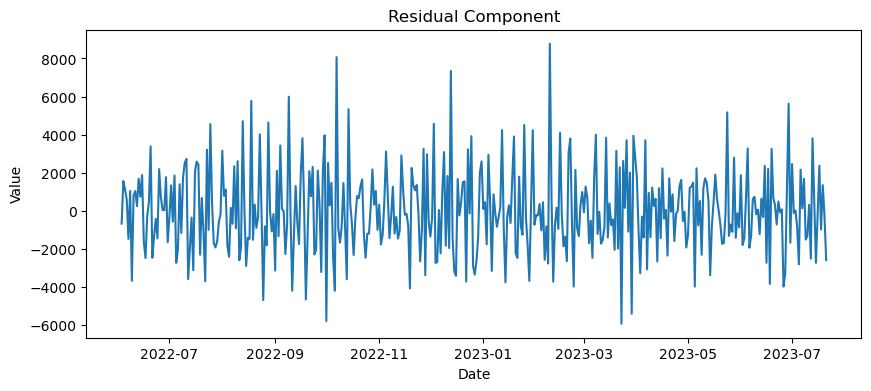

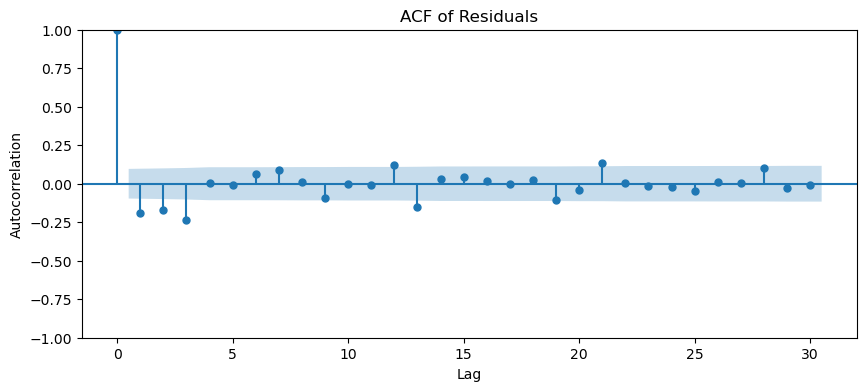

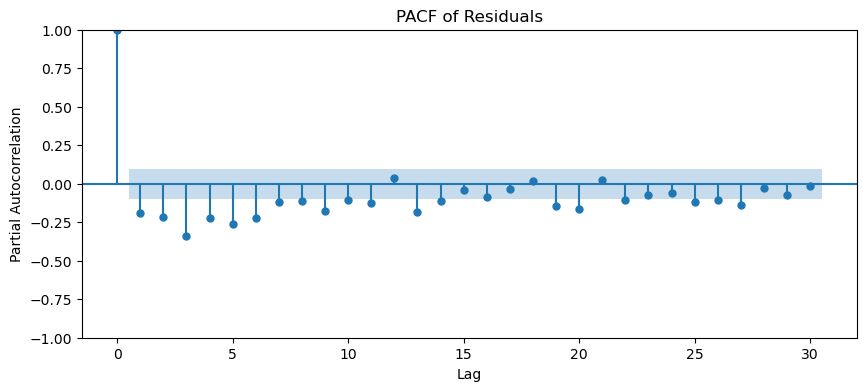

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition with the additive model
decomposition = seasonal_decompose(combined_data['Actual'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Time Series')
plt.show()

# Access the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Additional analysis and visualization methods
def plot_components(component, label):
    plt.figure(figsize=(10, 4))
    plt.plot(component)
    plt.title(f'{label} Component')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

# Plot the individual components
plot_components(trend, 'Trend')
plot_components(seasonal, 'Seasonal')
plot_components(residual, 'Residual')

# Calculate and plot the autocorrelation function (ACF) of residuals
plt.figure(figsize=(10, 4))
plot_acf(residual.dropna(), lags=30, ax=plt.gca())
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Calculate and plot the partial autocorrelation function (PACF) of residuals
plt.figure(figsize=(10, 4))
plot_pacf(residual.dropna(), lags=30, ax=plt.gca())
plt.title('PACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


Interpretation 

when we Look at the trend component plot. the line is generally increasing, which indicates a positive trend, suggesting that the variable is increasing over time. and the the line is decreases for a few time which it indicates a negative trend, implying a decreasing pattern that happens from 2023-03 showing that the line was at a negative rader, and gradually steeping high.

- from the trend we can see a few magnitudes of change 
- we can also see an inconsitent movemnt which is affected by factors around the Actual variable.
- And a few external factors can cause the Actual variable to change over time, such as weather.

Seasonal 
The seasonal component captures the regular fluctuations that happen within a specific period, which can provide insights into recurring patterns. looking at the season graph we a posetive to say the patten followed is more or less the same as the fluctuations are happening closely to the same parameter on average 

Residual CF

Dots on the Line (Lag 0):dots on the line at lag 0, it means that the residuals are correlated with themselves (i.e., autocorrelated) at lag 0. This could imply that our model might have systematic biases or trends that it's not accounting for.as we can see a few dots are on Zero.

there are a lot of dots below the line and fewer above the line in the ACF plot of residuals, it indicates a pattern of negative autocorrelation in the residuals. This type of autocorrelation suggests that there is a tendency for high or low values of residuals to follow low values of residuals at previous time steps. In other words, the residuals are correlated with their own past values in a negative manner.

PACF

In simple terms, the (PACF) plot of residuals shows more dots below the line (negative values) than above the line (positive values), it suggests that the errors or differences between our predicted values and actual values have a tendency to "correct" themselves.






#### Augmented Dickey-Fuller Test

In [67]:
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Perform Augmented Dickey-Fuller test
result = adfuller(combined_data['Actual'])
adf_results = [
    ("ADF Statistic", result[0]),
    ("p-value", result[1]),
    ("Critical Values (1%)", result[4]['1%']),
    ("Critical Values (5%)", result[4]['5%']),
    ("Critical Values (10%)", result[4]['10%']),
    ("Is Stationary", "Yes" if result[1] <= 0.05 else "No")
]

print("Augmented Dickey-Fuller Test Results:")
print(tabulate(adf_results, headers=["Test", "Value"], tablefmt="pretty"))




Augmented Dickey-Fuller Test Results:
+-----------------------+------------------------+
|         Test          |         Value          |
+-----------------------+------------------------+
|     ADF Statistic     |   -4.831054414326106   |
|        p-value        | 4.7415160406666126e-05 |
| Critical Values (1%)  |  -3.4465596717208813   |
| Critical Values (5%)  |  -2.8686852499495843   |
| Critical Values (10%) |   -2.570576203741901   |
|     Is Stationary     |          Yes           |
+-----------------------+------------------------+



Lets explain the above 

Is Stationary: This indicates whether the time series is stationary or not based on the p-value. In our case, since the p-value is very small (less than 0.05), "Yes" is displayed, indicating that there is strong evidence to suggest that the time series is stationary.

When conducting the test,the ADF statistic is more negative than the critical value at a particular confidence level, it suggests stronger evidence against the null hypothesis. Critical values serve as benchmarks to determine whether the observed statistic is extreme enough to reject the null hypothesis in favor of an alternative hypothesis, helping to assess the stationarity of a time series.

Before we go to the next step Let's start by considering a simple approach using trend analysis and basic visualizations to gain insights from our fitness running data

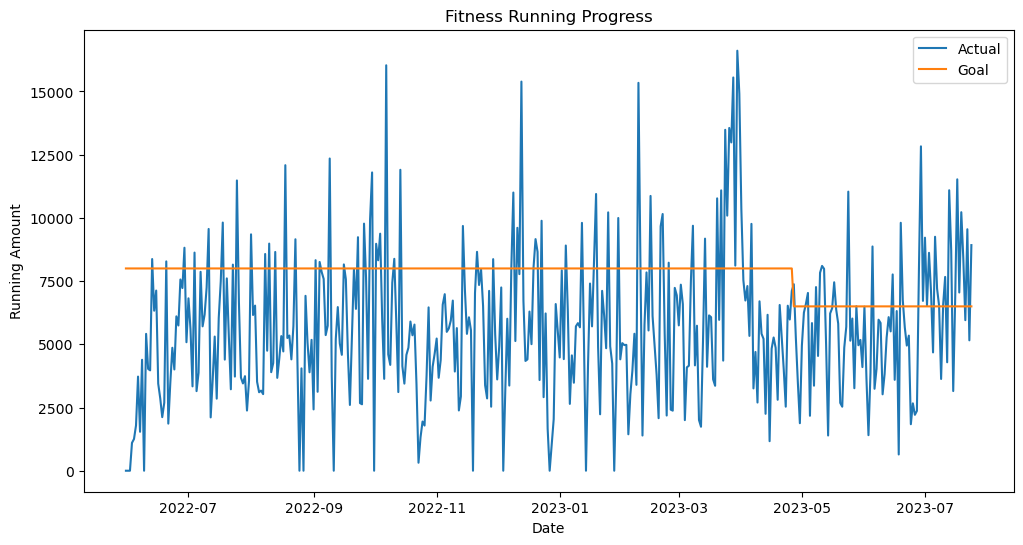

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['Actual'], label='Actual')
plt.plot(combined_data.index, combined_data['Goal'], label='Goal')
plt.title('Fitness Running Progress')
plt.xlabel('Date')
plt.ylabel('Running Amount')
plt.legend()
plt.show()



Lets calculate the cumulative sum of the actual running amounts over time to see the overall progress towards the fitness goals.

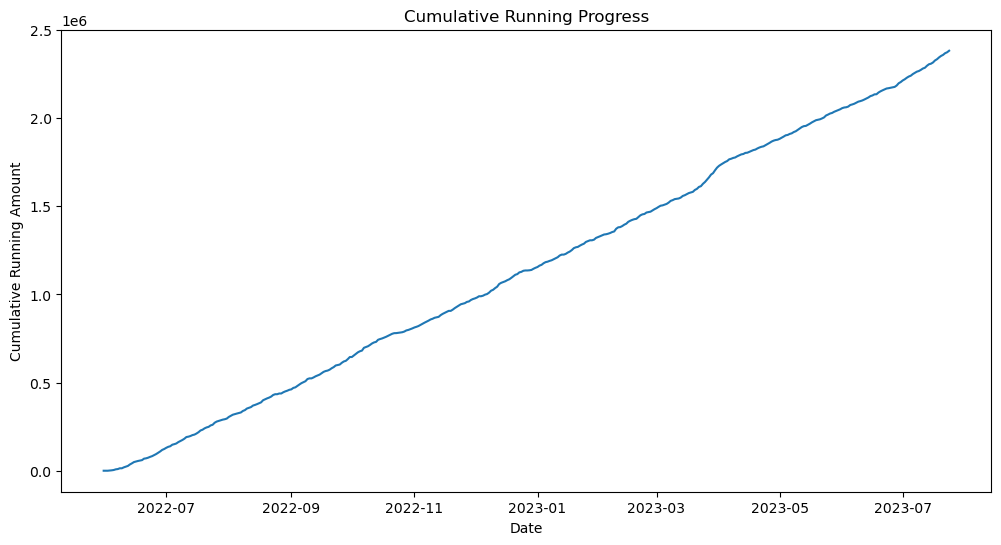

In [25]:
combined_data['cumulative_actual'] = combined_data['Actual'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['cumulative_actual'])
plt.title('Cumulative Running Progress')
plt.xlabel('Date')
plt.ylabel('Cumulative Running Amount')
plt.show()
# Set line parameters to create our line for neatness
line_color = (0, 0, 0)  # Black color
line_width = 5
line_length = 1200
image = Image.new("RGB", (line_length, line_width), line_color)
display(image)

## Step 4

we did some model fitting see step 3 on ACF and PACF to identify potential vlaues for the model parameters. here we just going to add on that 

The data exhibits seasonality (e.g., certain months or weeks of the year have different running patterns), SARIMA might be more appropriate. It extends ARIMA to include seasonal components. in this step we going to perform multiple codes of SARIMA then we will chose one.

We can also go back and look at our Autocorrelation functions.

## This is Just Me testing the SARIMA Algorythm. under this we will estimate the models parameters

In [3]:
import pandas as pd
import numpy as np
import pmdarima as pm
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore", category=FutureWarning, message="The frame.append method is deprecated")


# Load your time-series data
combined_data = pd.read_csv('combined_data.csv')

# Convert the "date" column to datetime and set it as index
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.set_index('Date', inplace=True)

# Choose the specific column for analysis (e.g., 'actual')
column_name = 'Actual'

# Extract the chosen column for train-test split and analysis
ts_data = combined_data[column_name]

# Train-test split (80% train, 20% test)
train_size = int(0.8 * len(ts_data))
train_data, test_data = ts_data.iloc[:train_size], ts_data.iloc[train_size:]

# Search for the best SARIMA model using AutoARIMA
auto_sarima_model = pm.auto_arima(train_data, seasonal=True, m=12, stepwise=True, suppress_warnings=True)

# Print the selected model's summary
print(auto_sarima_model.summary())

# Make forecasts on the test set
forecast_steps = len(test_data)
forecast, conf_int = auto_sarima_model.predict(n_periods=forecast_steps, return_conf_int=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print("Root Mean Squared Error (RMSE):", rmse)

# Set line parameters to create our line for neatness
line_color = (0, 0, 0)  # Black color
line_width = 5
line_length = 1200
image = Image.new("RGB", (line_length, line_width), line_color)
display(image)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  336
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -3154.811
Date:                Wed, 23 Aug 2023   AIC                           6319.622
Time:                        14:09:18   BIC                           6338.708
Sample:                    05-31-2022   HQIC                          6327.230
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3414.1849    424.727      8.039      0.000    2581.735    4246.634
ar.L1          0.1713      0.054      3.151      0.002       0.065       0.278
ar.L2          0.0880      0.047      1.860      0.0

## Lets try and estimate the model parameters.



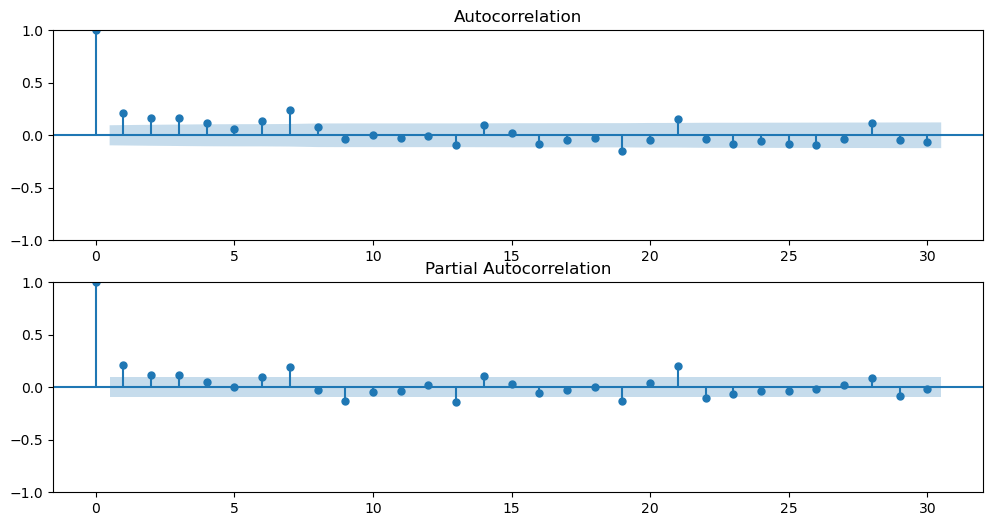

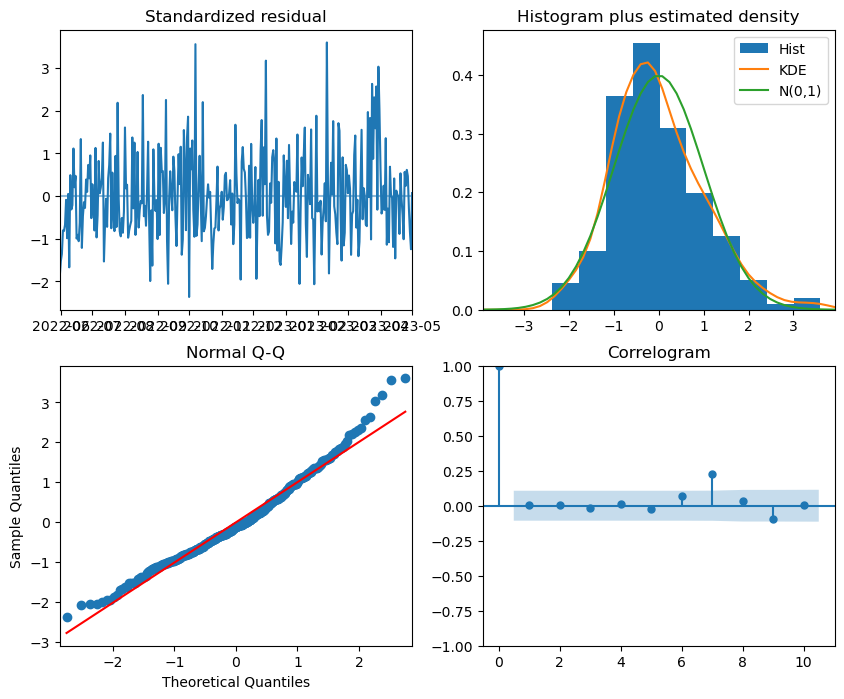

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore", category=FutureWarning)


# Load combined data from a CSV file
combined_data = pd.read_csv('combined_data.csv')
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.set_index('Date', inplace=True)

# Plot ACF and PACF to determine initial p, d, q, P, D, Q values
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(combined_data['Actual'], lags=30, ax=plt.gca())
plt.subplot(212)
plot_pacf(combined_data['Actual'], lags=30, ax=plt.gca())
plt.show()

# Choose the specific column for analysis (e.g., 'Actual')
column_name = 'Actual'

# Extract the chosen column for analysis
ts_data = combined_data[column_name]

# Split data into training and testing sets
train_size = int(0.8 * len(ts_data))
train_data, test_data = ts_data.iloc[:train_size], ts_data.iloc[train_size:]

# Use the auto_arima function to estimate model parameters
auto_sarima_model = pm.auto_arima(train_data, seasonal=True, m=12, stepwise=True, suppress_warnings=True)

# Plot the diagnostic plots for parameter estimation
auto_sarima_model.plot_diagnostics(figsize=(10, 8))
plt.show()


Above 

These plots include ACF (Autocorrelation Function), PACF (Partial Autocorrelation Function), histogram, and Q-Q plot of the residuals. These plots can help you identify if the estimated model is a good fit for the data or if further tuning is needed.So far SARIMA looks Good to be used. 

In terms of the Root Mean Squared Error (RMSE), a lower value indicates a better fit of the model to the data. Therefore, an RMSE of 2509 would be considered better than an RMSE of 2775. A lower RMSE indicates that the model's predictions are closer to the actual values, which suggests a better overall performance in terms of prediction accuracy but we going to apply it for the 25 of june 2023.

Now underneath lets apply Another SARIMA and we will try an twick to create a competative approach 
Main Code for SARIMA

We will repeat a few steps to ensure an error free code.

# From the 25 of june 2023

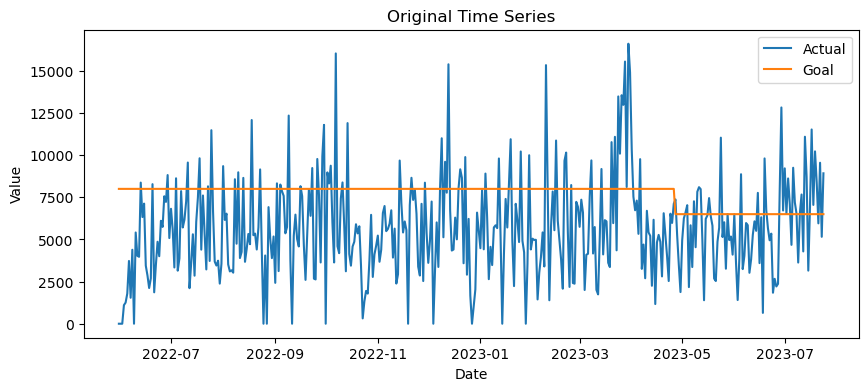

ADF Statistic: -4.831054414326106
p-value: 4.7415160406666126e-05
Critical Values: {'1%': -3.4465596717208813, '5%': -2.8686852499495843, '10%': -2.570576203741901}


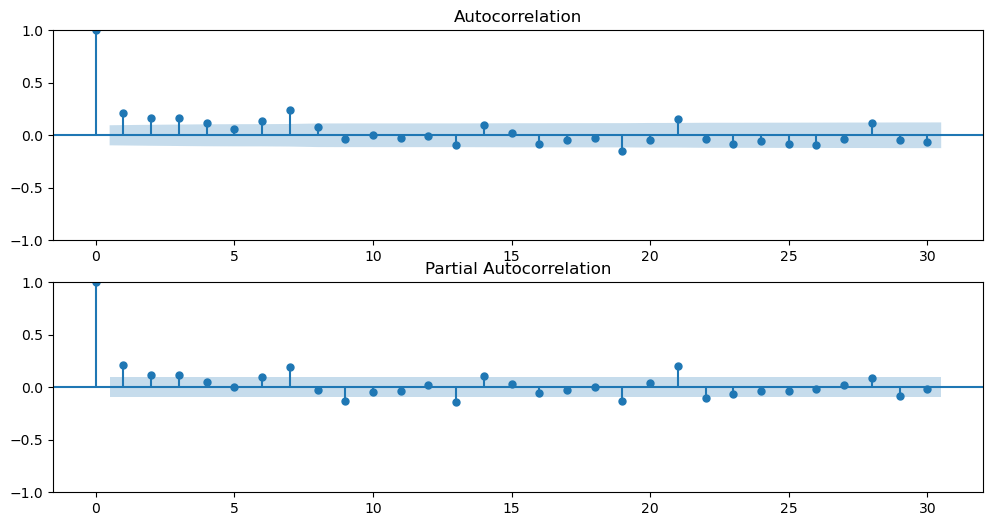

R-squared: -0.4360730285788743
Root Mean Squared Error (RMSE): 3332.818306384398


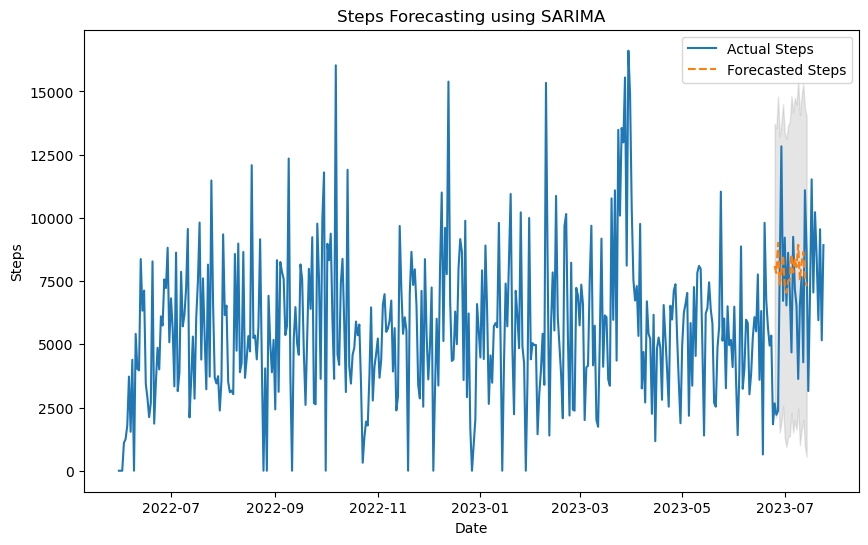

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")


# Load combined data from a CSV file
combined_data = pd.read_csv('combined_data.csv')
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.set_index('Date', inplace=True)

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(combined_data['Actual'], label='Actual')
plt.plot(combined_data['Goal'], label='Goal')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test on 'Actual' column
result = adfuller(combined_data['Actual'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Plot ACF and PACF to determine initial p, d, q, P, D, Q values
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(combined_data['Actual'], lags=30, ax=plt.gca())
plt.subplot(212)
plot_pacf(combined_data['Actual'], lags=30, ax=plt.gca())
plt.show()

# Define SARIMA parameters
p = 1 
d = 1  
q = 1  
P = 1  
D = 1  
Q = 1  
s = 12 
model = SARIMAX(combined_data['Actual'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Forecast future values starting from 25 June 2023
forecast_steps = 20
forecast_start_date = '2023-06-25'
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_steps)
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

actual_values = combined_data.loc[forecast_dates]['Actual']
r2 = r2_score(actual_values, forecast_mean)
print("R-squared:", r2)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_mean))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the actual and forecasted steps
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Actual'], label='Actual Steps')
plt.plot(forecast_dates, forecast_mean, label='Forecasted Steps', linestyle='dashed')
plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2)
plt.title('Steps Forecasting using SARIMA')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()


Lets try and create a competitive instance.
we can see that the above model works better when we initiate different variables.

we can see that the actual forecasting from the 25 of June is not to any point what we want. same as above the above forcasted going forward, lets try get to our prefared forcasting for the 25 of June and lower the RMSE

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  336
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -3154.811
Date:                Mon, 21 Aug 2023   AIC                           6319.622
Time:                        10:57:54   BIC                           6338.708
Sample:                    05-31-2022   HQIC                          6327.230
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3414.1849    424.727      8.039      0.000    2581.735    4246.634
ar.L1          0.1713      0.054      3.151      0.002       0.065       0.278
ar.L2          0.0880      0.047      1.860      0.0

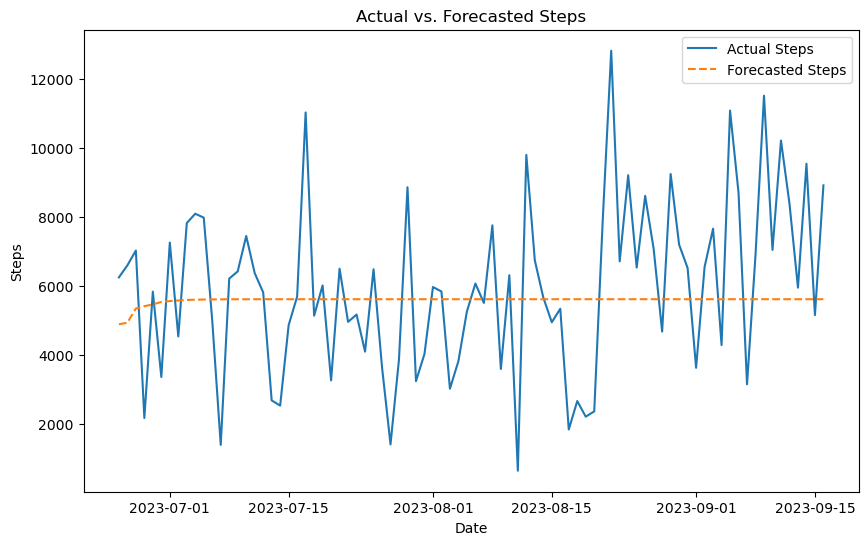

In [28]:
import pmdarima as pm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your time-series data
combined_data = pd.read_csv('combined_data.csv')

# Convert the "date" column to datetime and set it as index
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.set_index('Date', inplace=True)

# Choose the specific column for analysis (e.g., 'actual')
column_name = 'Actual'

# Extract the chosen column for analysis
ts_data = combined_data[column_name]

# Split data into training and testing sets
train_size = int(0.8 * len(ts_data))
train_data, test_data = ts_data.iloc[:train_size], ts_data.iloc[train_size:]

# Start forecasting from 25 June 2023
forecast_start_date = '2023-06-25'

# Search for the best SARIMA model using AutoARIMA
auto_sarima_model = pm.auto_arima(train_data, seasonal=True, m=12, stepwise=True, suppress_warnings=True)

# Print the selected model's summary
print(auto_sarima_model.summary())

# Make forecasts on the test set
forecast_steps = len(test_data)
forecast, conf_int = auto_sarima_model.predict(n_periods=forecast_steps, return_conf_int=True)

# Calculate RMSE and R2
rmse = np.sqrt(mean_squared_error(test_data, forecast))
r2 = r2_score(test_data, forecast)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Visualize actual vs. forecasted steps
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_steps)
actual_steps = test_data.values
forecasted_steps = forecast

plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, actual_steps, label='Actual Steps')
plt.plot(forecast_dates, forecasted_steps, label='Forecasted Steps', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.title('Actual vs. Forecasted Steps')
plt.legend()
plt.show()
# Set line parameters to create our line for neatness
line_color = (0, 0, 0)  # Black color
line_width = 5
line_length = 1200
image = Image.new("RGB", (line_length, line_width), line_color)
display(image)


Final step of the methodology

some of the answers are given such as the RMSE and the R-Squared but lets analyse going futher on and select the best model
1. Forecasting should start at 25 June 2023.
2. Make a visual comparison of the actual vs the forecasted steps



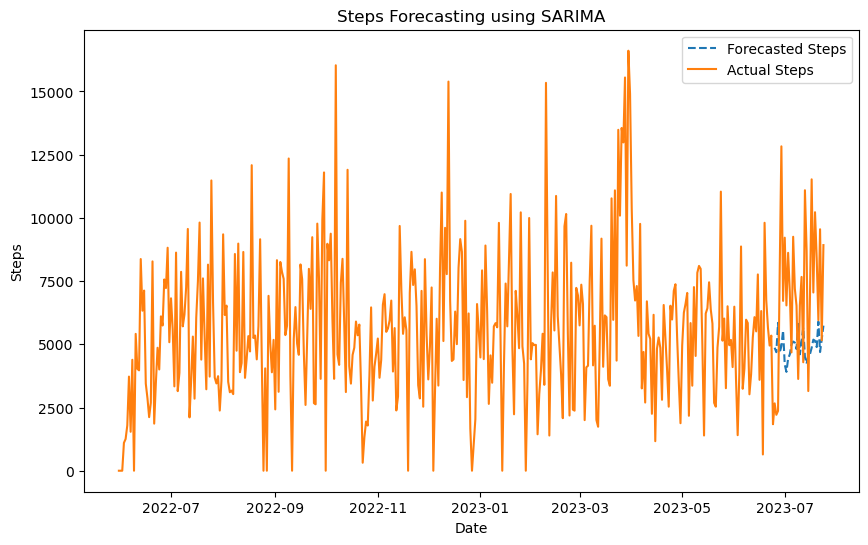

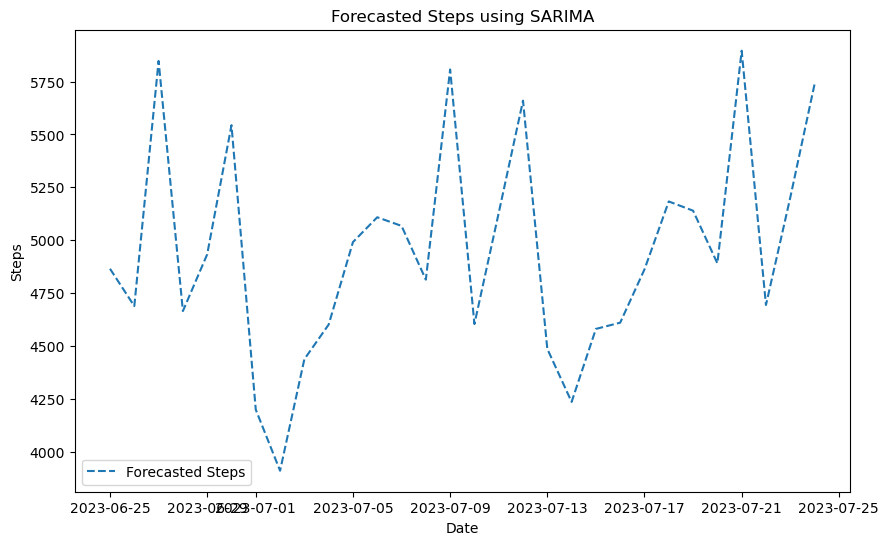

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your time-series data
combined_data = pd.read_csv('combined_data.csv')

# Convert the "Date" column to datetime and set it as the index
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.set_index('Date', inplace=True)

# Choose the specific column for analysis (e.g., 'Actual')
column_name = 'Actual'

# Extract the chosen column for analysis
ts_data = combined_data[column_name]

# Split data into training and testing sets
train_size = int(0.8 * len(ts_data))
train_data, test_data = ts_data.iloc[:train_size], ts_data.iloc[train_size:]

# Initialize and fit SARIMA model
order = (0, 1, 1)  # (p, d, q) order
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, seasonal_period)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

# Forecast steps using the fitted model
forecast_steps = model_fit.forecast(steps=30)

# Create forecast dates
forecast_dates = pd.date_range(start='2023-06-25', periods=30)

# Create a DataFrame for forecasted data
forecast_data = pd.DataFrame({'Date': forecast_dates, 'forecast_steps': forecast_steps})



# Plot the forecasted steps and actual steps
plt.figure(figsize=(10, 6))
plt.plot(forecast_data['Date'], forecast_data['forecast_steps'], label='Forecasted Steps', linestyle='dashed')
plt.plot(ts_data.index, ts_data.values, label='Actual Steps')
plt.title('Steps Forecasting using SARIMA')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()


# Plot the forecasted steps
plt.figure(figsize=(10, 6))
plt.plot(forecast_data['Date'], forecast_data['forecast_steps'], label='Forecasted Steps', linestyle='dashed')
plt.title('Forecasted Steps using SARIMA')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()


# The Below is choosen forecasting with the RMSE of 2600 we also have one for 2509

Mean Squared Error (MSE): 6764976.056484729
Root Mean Squared Error (RMSE): 2600.956757903662
R-squared (R2): 0.06774655771505511


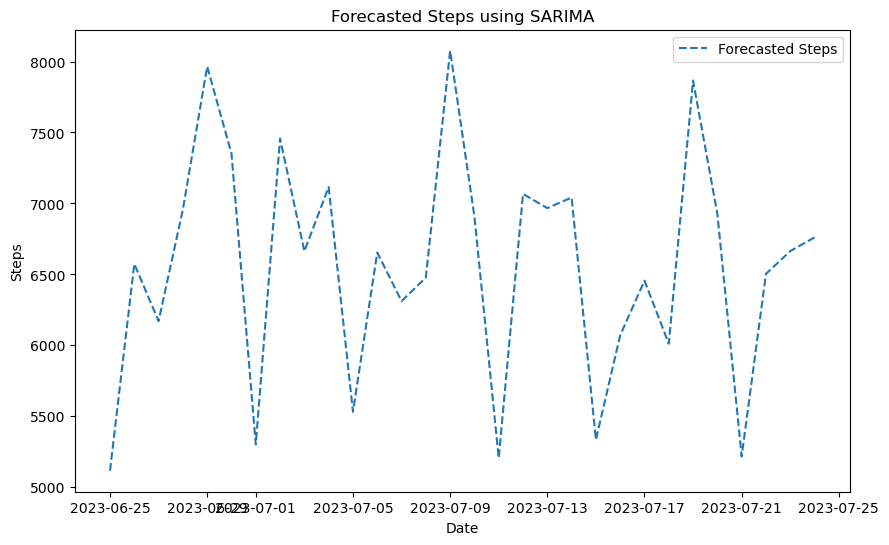

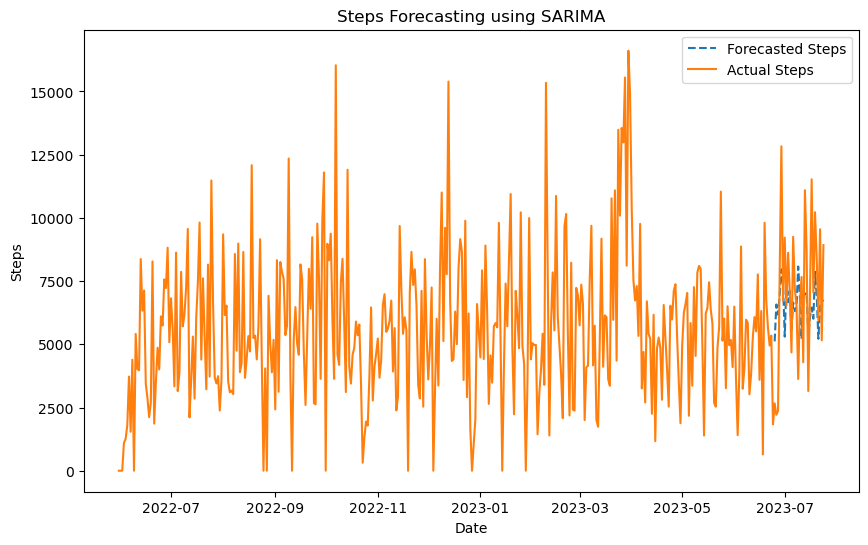

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

# Load your time-series data
combined_data = pd.read_csv('combined_data.csv')

# Convert the "Date" column to datetime and set it as the index
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.set_index('Date', inplace=True)

# Choose the specific column for analysis (e.g., 'Actual')
column_name = 'Actual'

# Extract the chosen column for analysis
ts_data = combined_data[column_name]

# Split data into training and testing sets
train_size = int(0.8 * len(ts_data))
train_data, test_data = ts_data.iloc[:train_size], ts_data.iloc[train_size:]

# Initialize and fit SARIMA model
order = (0, 0, 1)  # (p, d, q) order
seasonal_order = (1, 0, 4, 10)  # (P, D, Q, seasonal_period)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

# Forecast steps using the fitted model
forecast_start_date = '2023-06-25'
forecast_steps = 30  # Forecast for 30 steps
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_steps)
forecast_steps = model_fit.forecast(steps=forecast_steps)

# Calculate MSE and R2 for the forecasted period
actual_steps = ts_data.loc[forecast_dates]
mse = mean_squared_error(actual_steps, forecast_steps)
rmse = np.sqrt(mse)
r2 = r2_score(actual_steps, forecast_steps)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)  # Calculate RMSE after calculating MSE
print("R-squared (R2):", r2)

# Create a DataFrame for forecasted data
forecast_data = pd.DataFrame({'Date': forecast_dates, 'forecast_steps': forecast_steps})

# Plot the forecasted steps
plt.figure(figsize=(10, 6))
plt.plot(forecast_data['Date'], forecast_data['forecast_steps'], label='Forecasted Steps', linestyle='dashed')
plt.title('Forecasted Steps using SARIMA')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()

# Plot the forecasted steps and actual steps
plt.figure(figsize=(10, 6))
plt.plot(forecast_data['Date'], forecast_data['forecast_steps'], label='Forecasted Steps', linestyle='dashed')
plt.plot(ts_data.index, ts_data.values, label='Actual Steps')
plt.title('Steps Forecasting using SARIMA')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()


# The Above is choosen forecasting with the RMSE of 2600 we also have one for 2509

The below was used to test and compare 

The time series is stationary.
Mean Squared Error (MSE): 10973979.548196245
Root Mean Squared Error (RMSE): 3312.6997371020884
R-squared (R2): -0.7829570477367123


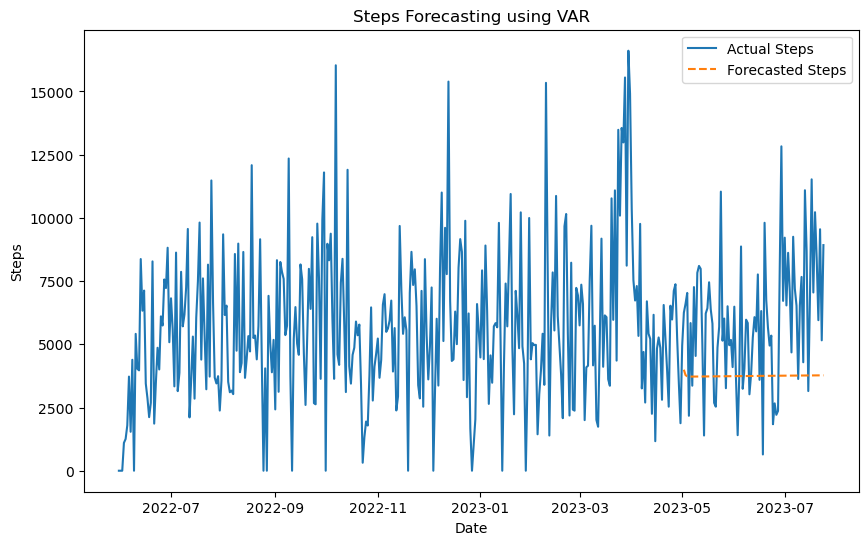

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Load your time-series data
combined_data = pd.read_csv('combined_data.csv')

# Convert the "Date" column to datetime and set it as the index
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.set_index('Date', inplace=True)

# Choose the specific columns for analysis (e.g., 'Actual' and 'Goal')
columns = ['Actual', 'Goal']

# Extract the chosen columns for analysis
ts_data = combined_data[columns]

# Split data into training and testing sets
train_size = int(0.8 * len(ts_data))
train_data, test_data = ts_data.iloc[:train_size], ts_data.iloc[train_size:]

# Perform Augmented Dickey-Fuller test to check stationarity
adf_results = adfuller(train_data['Actual'])
if adf_results[1] > 0.05:
    print("The time series is not stationary. Please consider differencing.")
else:
    print("The time series is stationary.")

# Fit VAR model
model = VAR(train_data)
model_fit = model.fit()

# Forecast steps using the fitted VAR model
forecast_steps = len(test_data)
forecast_steps = model_fit.forecast(model_fit.endog, steps=forecast_steps)

# Calculate MSE and R2 for the forecasted period
actual_steps = test_data['Actual'].values
forecasted_actual_steps = forecast_steps[:, 0]  # Forecasted 'Actual' steps
mse = mean_squared_error(actual_steps, forecasted_actual_steps)
rmse = np.sqrt(mse)
r2 = r2_score(actual_steps, forecasted_actual_steps)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Create a DataFrame for forecasted data
forecast_dates = pd.date_range(start=test_data.index[0], periods=forecast_steps.shape[0])
forecast_data = pd.DataFrame({'Date': forecast_dates, 'forecasted_actual_steps': forecasted_actual_steps})

# Plot the actual and forecasted steps
plt.figure(figsize=(10, 6))
plt.plot(ts_data.index, ts_data['Actual'], label='Actual Steps')
plt.plot(forecast_data['Date'], forecast_data['forecasted_actual_steps'], label='Forecasted Steps', linestyle='dashed')
plt.title('Steps Forecasting using VAR')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()


Reflection
1. Outline your decision-making process, i.e. why you made the choices you 
made.
2. Outline what you learned from the data and provide some insights into it.
3. Outline what you will do differently next time.


Outline your decision-making process, i.e. why you made the choices you made.

In practice, it's often beneficial to experiment with different models, evaluate their performance using appropriate metrics (e.g., RMSE, R-squared), and consider factors such as model complexity and interpretability before making a final decision. Additionally, exploring more advanced models like LSTM, Gaussian Process Regression, and Holt-Winters might also provide insights into which model works best for your specific dataset and forecasting requirements.

After using 3 types of models the SARIMA came up first, the reason why other models where not included is because thier values ranged from 6585 to 8552, the process i used was to make sure the model can get me stationarity check and i am able to identify my own parameters.

First things i did was to :
1. Understand my data 
2. what are the goals on forcasting 
3. identify trends and patterns 
4. try selecting a model 
5. Compare the models 
6. monitor the best model 
7. select the best model which in my place is SARIMA

Outline what you learned from the data and provide some insights into it.

Looking at the data closely, we see a clear pattern in how the user exercises. They seem to be more active during weekdays, like Monday to Friday, when they're probably following their fitness routine. But on weekends, like Saturday and Sunday, their exercise drops, which might mean they're taking it easy and enjoying leisure time, the interesting part comes from the graphs showing how the user is getting closer to their exercise goal over time. The number of steps they take is slowly going up. This shows they're making steady progress and sticking to their plan. This hard work matches their determination to reach their goal. The pictures from the data back this up and show how doing exercise regularly has a positive effect.

In simple terms, the data tells us how the user's exercise habits change during the week and weekend. It also shows their effort paying off by moving closer to their goal. This story of getting better bit by bit highlights how their way of exercising is working well and sticking to the plan is important.

Outline what you will do differently next time.


If I were to make improvements, I'd take a broader approach by incorporating more models and harnessing the power of Artificial Intelligence (AI) and Machine Learning (ML) for forecasting. Expanding my toolkit of models, such as exploring ensemble methods, neural networks, and hybrid models, would provide a comprehensive view of predictive outcomes, to achieve this, I'd invest time in self-learning, diving deeper into AI and ML techniques through online courses, tutorials, and resources. By enhancing my understanding of algorithms and their applications, I'd be better equipped to implement advanced forecasting models.

In essence, my strategy would involve continuous learning and experimentation with a diverse range of models, coupled with AI and ML technologies. This approach aims to optimize forecasting precision, adaptability, and the ability to uncover valuable insights from complex datasets.
